# Manhathan o3 y Pm2.5


In [2]:
import pandas as pd

# Load the dataset to analyze it
file_path = 'openaq_locationManhatanmeasurments.csv'
data = pd.read_csv(file_path)

# Basic overview of the dataset
data_info = {
    "head": data.head(),
    "info": data.info(),
    "describe": data.describe(include='all'),
    "shape": data.shape
}

data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    2000 non-null   int64  
 1   location_name  2000 non-null   object 
 2   parameter      2000 non-null   object 
 3   value          2000 non-null   float64
 4   unit           2000 non-null   object 
 5   datetimeUtc    2000 non-null   object 
 6   datetimeLocal  2000 non-null   object 
 7   timezone       2000 non-null   object 
 8   latitude       2000 non-null   float64
 9   longitude      2000 non-null   float64
 10  country_iso    0 non-null      float64
 11  isMobile       0 non-null      float64
 12  isMonitor      0 non-null      float64
 13  owner_name     2000 non-null   object 
 14  provider       2000 non-null   object 
dtypes: float64(6), int64(1), object(8)
memory usage: 234.5+ KB


{'head':    location_id location_name parameter  value unit           datetimeUtc  \
 0          384          CCNY        o3  0.003  ppm  2023-12-10T01:00:00Z   
 1          384          CCNY        o3  0.001  ppm  2023-12-10T02:00:00Z   
 2          384          CCNY        o3  0.001  ppm  2023-12-10T03:00:00Z   
 3          384          CCNY        o3  0.001  ppm  2023-12-10T04:00:00Z   
 4          384          CCNY        o3  0.001  ppm  2023-12-10T05:00:00Z   
 
                datetimeLocal          timezone  latitude  longitude  \
 0  2023-12-09T20:00:00-05:00  America/New_York   40.8197   -73.9481   
 1  2023-12-09T21:00:00-05:00  America/New_York   40.8197   -73.9481   
 2  2023-12-09T22:00:00-05:00  America/New_York   40.8197   -73.9481   
 3  2023-12-09T23:00:00-05:00  America/New_York   40.8197   -73.9481   
 4  2023-12-10T00:00:00-05:00  America/New_York   40.8197   -73.9481   
 
    country_iso  isMobile  isMonitor                         owner_name  \
 0          NaN    

In [3]:
data.shape

(2000, 15)

1. Datos Faltantes
Las columnas country_iso, isMobile, e isMonitor contienen solo valores nulos (NaN) y no aportan información útil.
Todas las demás columnas tienen valores completos, sin datos faltantes. No se encontraron filas duplicadas.
2. Duplicados
Se detectaron 22 valores atípicos en la columna value. Puedes visualizar los datos en un archivo separado para un análisis más detallado.

3. Outliers
La columna value, que representa mediciones, tiene un rango amplio de valores desde -3.4 hasta 28.8. Esto puede incluir outliers, especialmente valores negativos, que no parecen coherentes para mediciones ambientales.

country_iso, isMobile e isMonitor están completamente vacías, con 2000 valores nulos cada una.
Todas las demás columnas están completas y no presentan valores nulos.

4. Resumen de Columnas Relevantes
location_id: Todos los valores son 384, lo que indica que la ubicación es constante.
latitude y longitude: Son constantes para todas las filas.
parameter: Hay dos valores únicos (o3 y otro parámetro no especificado).
owner_name y provider: Solo tienen un valor único cada uno.

# Analisis estadistico de Pm25 y o3

In [4]:
# Filter data for pm25 and o3 parameters
pm25_data = data[data['parameter'] == 'pm25']['value']
o3_data = data[data['parameter'] == 'o3']['value']

# Statistical analysis
statistical_analysis = {
    "pm25": {
        "mean": pm25_data.mean(),
        "median": pm25_data.median(),
        "std_dev": pm25_data.std(),
        "min": pm25_data.min(),
        "max": pm25_data.max(),
        "quantiles": pm25_data.quantile([0.25, 0.5, 0.75]).to_dict(),
    },
    "o3": {
        "mean": o3_data.mean(),
        "median": o3_data.median(),
        "std_dev": o3_data.std(),
        "min": o3_data.min(),
        "max": o3_data.max(),
        "quantiles": o3_data.quantile([0.25, 0.5, 0.75]).to_dict(),
    },
}

statistical_analysis


{'pm25': {'mean': 8.514299999999999,
  'median': 8.1,
  'std_dev': 4.233857704394547,
  'min': -3.4,
  'max': 28.8,
  'quantiles': {0.25: 5.9, 0.5: 8.1, 0.75: 10.6}},
 'o3': {'mean': 0.016894000000000003,
  'median': 0.018,
  'std_dev': 0.009759816495099589,
  'min': 0.0,
  'max': 0.04,
  'quantiles': {0.25: 0.009, 0.5: 0.018, 0.75: 0.025}}}

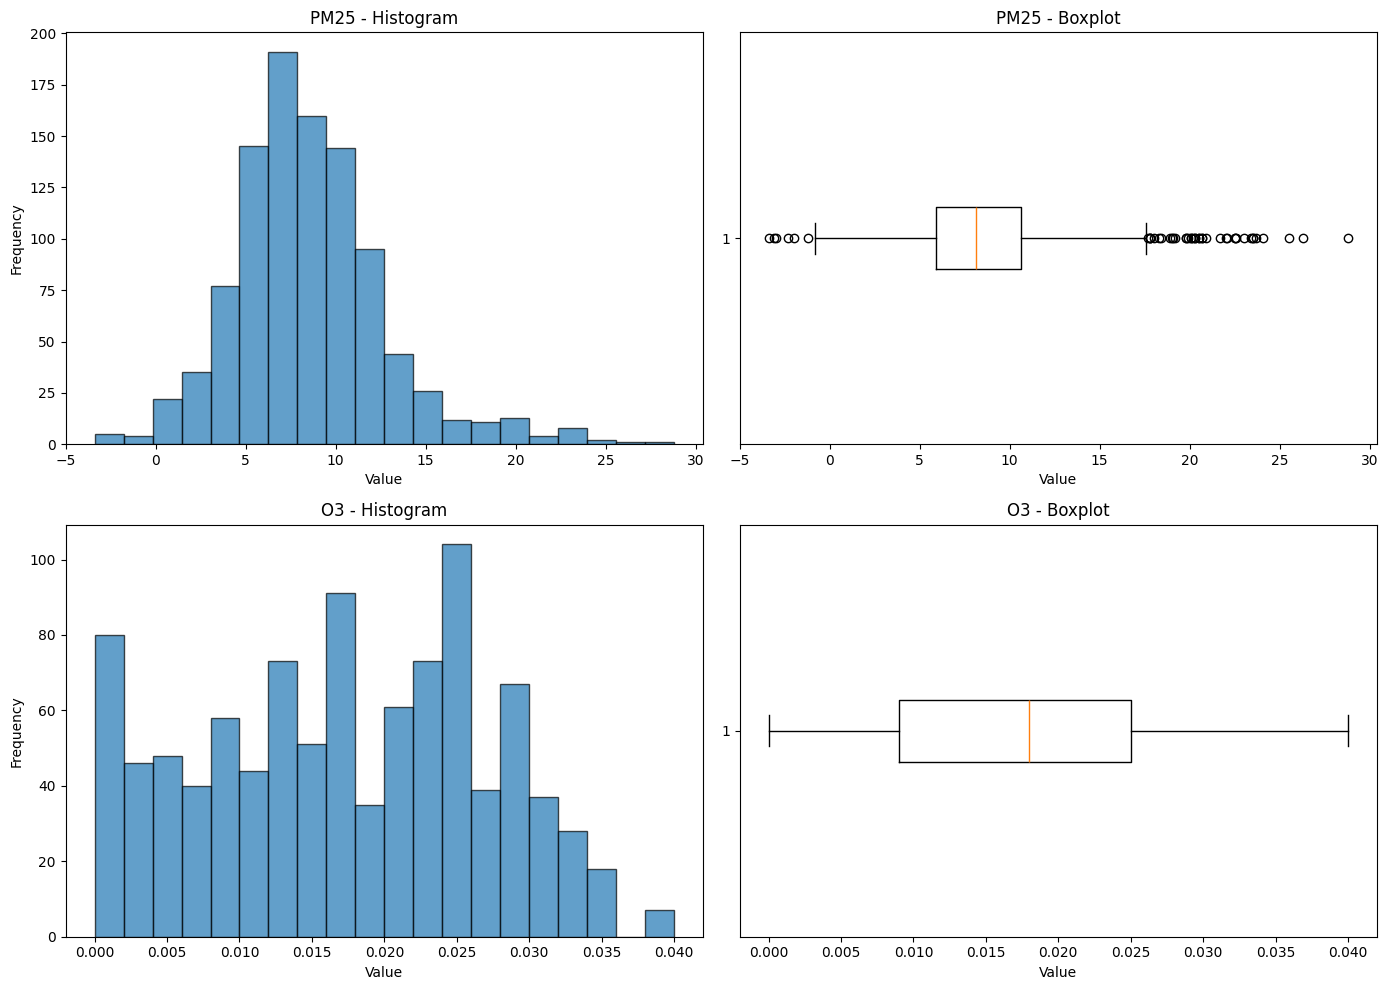

In [5]:
import matplotlib.pyplot as plt

# Plot histograms and boxplots for PM25 and O3
plt.figure(figsize=(14, 10))

# PM25 Histogram
plt.subplot(2, 2, 1)
plt.hist(pm25_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('PM25 - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# PM25 Boxplot
plt.subplot(2, 2, 2)
plt.boxplot(pm25_data, vert=False)
plt.title('PM25 - Boxplot')
plt.xlabel('Value')

# O3 Histogram
plt.subplot(2, 2, 3)
plt.hist(o3_data, bins=20, edgecolor='k', alpha=0.7)
plt.title('O3 - Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# O3 Boxplot
plt.subplot(2, 2, 4)
plt.boxplot(o3_data, vert=False)
plt.title('O3 - Boxplot')
plt.xlabel('Value')

plt.tight_layout()
plt.show()


- Descripción de las Gráficas

1. PM25 - Histograma:
La mayoría de los valores están concentrados entre 5 y 12, con un pico alrededor de 8.
Hay algunos valores extremos hacia ambos lados, incluyendo negativos, que pueden ser outliers.

2. PM25 - Boxplot:
La mediana está alrededor de 8.1.
Se observan valores atípicos (outliers) por debajo de 0 y por encima de 20.

3. O3 - Histograma:
La distribución de los valores es más estrecha, con la mayoría concentrados entre 0.01 y 0.03.
La frecuencia disminuye significativamente hacia valores cercanos a 0.04.

4. O3 - Boxplot:
La mediana está cerca de 0.018.
No se observan valores atípicos destacados, y la distribución parece uniforme.

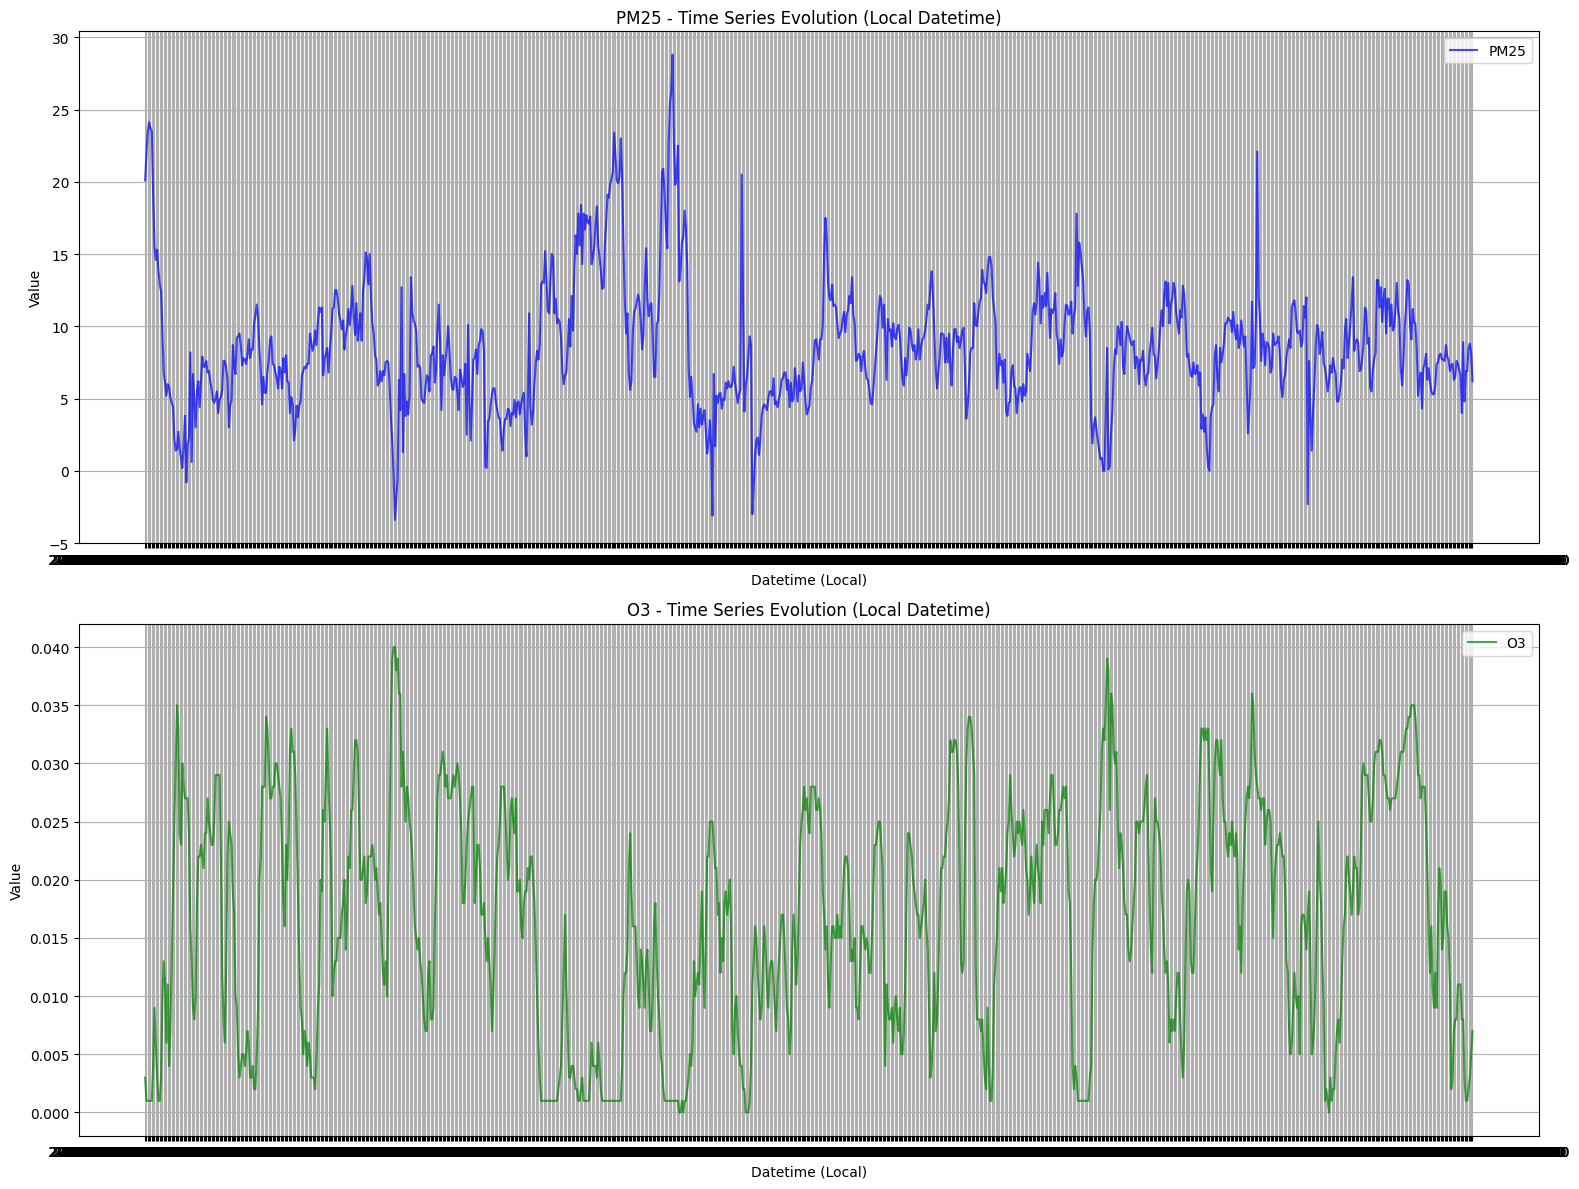

In [ ]:
# Agrupar los datos por datetimeLocal para analizar directamente la serie temporal.
pm25_local = data[data['parameter'] == 'pm25'][['datetimeLocal', 'value']].sort_values('datetimeLocal')
o3_local = data[data['parameter'] == 'o3'][['datetimeLocal', 'value']].sort_values('datetimeLocal')

# Plot serie de tiempo
plt.figure(figsize=(16, 12))

# PM25 Evolucion
plt.subplot(2, 1, 1)
plt.plot(pm25_local['datetimeLocal'], pm25_local['value'], label='PM25', color='blue', alpha=0.7)
plt.title('PM25 - Time Series Evolution (Local Datetime)')
plt.xlabel('Datetime (Local)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# O3 Evolucion
plt.subplot(2, 1, 2)
plt.plot(o3_local['datetimeLocal'], o3_local['value'], label='O3', color='green', alpha=0.7)
plt.title('O3 - Time Series Evolution (Local Datetime)')
plt.xlabel('Datetime (Local)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


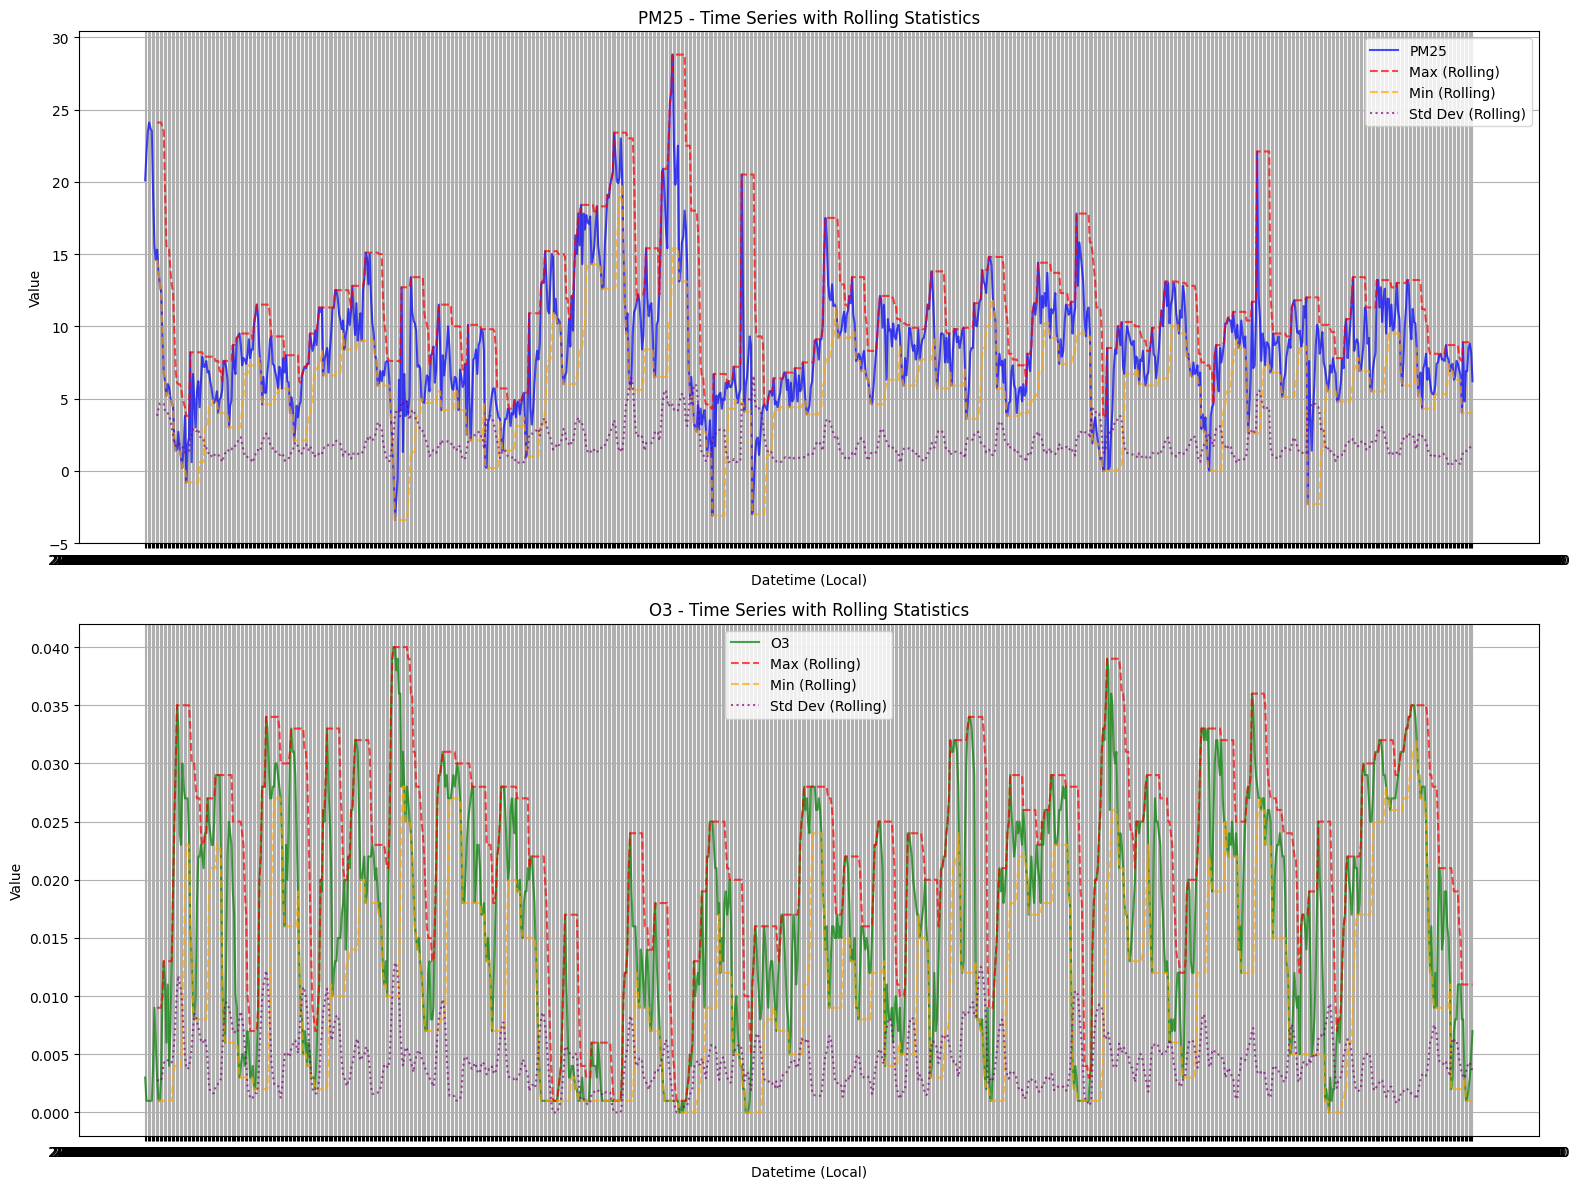

In [ ]:
# Calcular estadísticas móviles para los valores máximo, mínimo y la desviación estándar con un tamaño de ventana definido.
window_size = 10  

pm25_local['max'] = pm25_local['value'].rolling(window=window_size).max()
pm25_local['min'] = pm25_local['value'].rolling(window=window_size).min()
pm25_local['std'] = pm25_local['value'].rolling(window=window_size).std()

o3_local['max'] = o3_local['value'].rolling(window=window_size).max()
o3_local['min'] = o3_local['value'].rolling(window=window_size).min()
o3_local['std'] = o3_local['value'].rolling(window=window_size).std()

# Graficar la serie temporal con estadísticas móviles.
plt.figure(figsize=(16, 12))

# PM25 Evolucion
plt.subplot(2, 1, 1)
plt.plot(pm25_local['datetimeLocal'], pm25_local['value'], label='PM25', color='blue', alpha=0.7)
plt.plot(pm25_local['datetimeLocal'], pm25_local['max'], label='Max (Rolling)', color='red', linestyle='--', alpha=0.7)
plt.plot(pm25_local['datetimeLocal'], pm25_local['min'], label='Min (Rolling)', color='orange', linestyle='--', alpha=0.7)
plt.plot(pm25_local['datetimeLocal'], pm25_local['std'], label='Std Dev (Rolling)', color='purple', linestyle=':', alpha=0.7)
plt.title('PM25 - Time Series with Rolling Statistics')
plt.xlabel('Datetime (Local)')
plt.ylabel('Value')
plt.legend()
plt.grid()

# O3 Evolucion
plt.subplot(2, 1, 2)
plt.plot(o3_local['datetimeLocal'], o3_local['value'], label='O3', color='green', alpha=0.7)
plt.plot(o3_local['datetimeLocal'], o3_local['max'], label='Max (Rolling)', color='red', linestyle='--', alpha=0.7)
plt.plot(o3_local['datetimeLocal'], o3_local['min'], label='Min (Rolling)', color='orange', linestyle='--', alpha=0.7)
plt.plot(o3_local['datetimeLocal'], o3_local['std'], label='Std Dev (Rolling)', color='purple', linestyle=':', alpha=0.7)
plt.title('O3 - Time Series with Rolling Statistics')
plt.xlabel('Datetime (Local)')
plt.ylabel('Value')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


Variables PM25 y O3

- Evolución del valor directo: Representada por la línea principal (azul para PM25 y verde para O3).
- Máximos (Rolling Max): Línea roja discontinua, calculada con una ventana móvil de 10 puntos.
- Mínimos (Rolling Min): Línea naranja discontinua, también con ventana móvil de 10 puntos.
- Desviación Estándar (Rolling Std Dev): Línea púrpura punteada, mostrando la variabilidad en cada ventana.

Análisis de la Evolución Temporal de PM25 y O3
1. PM25:

- Evolución Directa:
La serie temporal muestra fluctuaciones significativas en los valores de PM25.
Hay picos pronunciados en ciertos puntos, lo que sugiere episodios de alta concentración.

- Máximos (Rolling Max):
Los máximos calculados en una ventana móvil de 10 puntos destacan tendencias ascendentes y descendentes en picos locales.
Estos máximos parecen alinearse con eventos significativos de contaminación.

- Mínimos (Rolling Min):
Los valores mínimos muestran una tendencia más estable en comparación con los máximos.
Algunas caídas abruptas son indicativas de episodios de baja concentración.

- Desviación Estándar (Rolling Std Dev):
La variabilidad es alta en períodos de fluctuación intensa, como en los picos.
En episodios de baja actividad, la desviación estándar se reduce, reflejando estabilidad.

2. O3:
- Evolución Directa:
La serie temporal de O3 es más uniforme que la de PM25, con valores que se mantienen dentro de un rango estrecho.
No se observan picos tan pronunciados como en PM25.

- Máximos (Rolling Max):
Los máximos muestran ligeras fluctuaciones, pero permanecen dentro de un rango predecible.
Esto indica estabilidad en la concentración máxima de O3.

- Mínimos (Rolling Min):
Similar a los máximos, los mínimos presentan poca variabilidad.
La estabilidad general de los mínimos sugiere un comportamiento controlado o natural de este parámetro.

- Desviación Estándar (Rolling Std Dev):
Los valores de desviación estándar son bajos en toda la serie, indicando poca variación.
Los períodos con desviación estándar más alta coinciden con leves aumentos en los valores de O3.

Observaciones Generales:
PM25 muestra un comportamiento más dinámico y variable, reflejando posiblemente eventos locales o cambios en las condiciones ambientales.
O3, en contraste, presenta una estabilidad notable, lo que podría estar relacionado con su formación y dispersión natural en la atmósfera.